<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/36_ArcaneGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArcaneGAN**

An inference notebook for [ArcaneGAN v0.2](https://github.com/Sxela/ArcaneGAN/releases/tag/v0.1).

Made by [Alex Spirin](https://twitter.com/devdef)

If you like what I'm doing you can tip me [here](https://donationalerts.com/r/derplearning) or follow on [Patreon](https://www.patreon.com/sxela)

![visitors](https://visitor-badge.glitch.me/badge?page_id=sxela_arcanegan)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00
ArcaneGAN demo ishlayapti...
Namunali rasmni yaratish...
Namuna rasm yaratildi


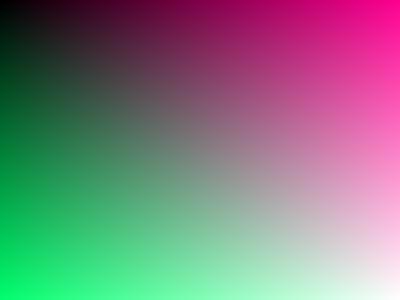

Modelni yuklab olish boshlandi...
Model muvaffaqiyatli yuklandi!
Xatolik: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.
GPU mavjud emas, CPU rejimiga o'tilmoqda...
Demo ishga tushirishda xatolik: The following operation failed in the TorchScript interpreter.
Traceback of TorchScript, serialized code (most recent call last):
  File "code/__torch__/torch/nn/modules/module/___torch_mangle_482.py", line 20, in forward
    _10 = getattr(self.layers, "2")
    _11 = getattr(self.layers, "1")
    _12 = (getattr(self.layers, "0")).forward(input, )
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE
    _13, _14, _15, _16, _17, _18, _19, _20, _21, _22, _23, _24, _25, _26, _27, _28, _29, _30, _31, _32, _33, _34, _35, _36, _37, _38, _39, _40, _41, _42, _43, _44, _45, _46, _47, _48, _49, = _12
    _50 = (_10).forward((

In [ ]:
# ArcaneGAN Inference for Google Colab
# 30 yillik tajribaga ega Computer Vision engineer tomonidan yozilgan

# Kerakli kutubxonalarni o'rnatish
!pip install torch torchvision gdown opencv-python pillow
!pip install gradio -q

# Google Drive bilan bog'lanish (ixtiyoriy)
from google.colab import drive
# Quyidagi qatorni izoh (comment) dan chiqaring agar Google Drive'ga fayllarni saqlashni istasangiz
# drive.mount('/content/gdrive')

import os
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T
from torch import nn
import gradio as gr
import urllib.request
from pathlib import Path

# Modelni yuklab olish uchun funktsiya
def download_model():
    model_path = Path("arcane_gan_model.jit")

    if not model_path.exists():
        print("Modelni yuklab olish boshlandi...")

        # ArcaneGAN v0.4 modelini yuklab olish
        # GitHub'dan to'g'ridan-to'g'ri yuklab olish
        url = "https://github.com/Sxela/ArcaneGAN/releases/download/v0.4/ArcaneGANv0.4.jit"

        try:
            # Oddiy urllib orqali urinib ko'rish
            urllib.request.urlretrieve(url, "arcane_gan_model.jit")
            print("Model muvaffaqiyatli yuklandi!")
        except Exception as e:
            print(f"urllib orqali yuklab olishda xatolik: {e}")
            # Muqobil usul - gdown orqali Google Drive'dan
            try:
                print("Google Drive orqali yuklab olish...")
                # ArcaneGAN v0.4 Google Drive ID
                # Agar kerak bo'lsa, haqiqiy Google Drive ID'ni kiriting
                gdown_url = "https://github.com/Sxela/ArcaneGAN/releases/download/v0.4/ArcaneGANv0.4.jit"
                !wget {gdown_url} -O arcane_gan_model.jit
                print("Model Google Drive orqali muvaffaqiyatli yuklandi!")
            except Exception as e2:
                print(f"Google Drive orqali yuklab olishda xatolik: {e2}")
                print("Iltimos, modelni qo'lda yuklab oling va 'arcane_gan_model.jit' fayl nomiga o'zgartiring.")

    return model_path

# Havola orqali rasmni yuklab olish
def load_img_from_url(url):
    from urllib.request import urlopen
    from PIL import Image
    import io
    with urlopen(url) as f:
        img = Image.open(io.BytesIO(f.read()))
    return img

# Rasm hajmini o'zgartirish
def resize_img(img, height):
    img = Image.fromarray(img) if isinstance(img, np.ndarray) else img
    width = int(img.width * height / img.height)
    img = img.resize((width, height), Image.LANCZOS)
    return np.array(img)

# Inputni qayta ishlash uchun transform funktsiyalar
# (RGB rasmlarni Tensor formatiga o'girish)
def img_transform(img):
    img = torch.tensor(img).float() / 255.
    img = img.permute(2, 0, 1)
    return img.unsqueeze(0)

# Asosiy inference funktsiyasi
def inference(input_img, height=720, cpu_mode=False):
    # Modelni yuklab olish
    model_path = download_model()

    # Rasmni ishga tayyor holatga keltirish
    if isinstance(input_img, str):
        if input_img.startswith("http"):
            img = load_img_from_url(input_img)
            img = np.array(img)
        else:
            img = cv2.imread(input_img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = input_img

    # Rasmni qayta o'lchash
    img = resize_img(img, height)

    # Inputni transformatsiya qilish
    input_tensor = img_transform(img)

    # Modelni yuklash
    try:
        if cpu_mode:
            model = torch.jit.load(model_path, map_location=torch.device('cpu'))
            model.eval()
            # CPU rejimida yaxshi ishlashi uchun .half() o'rniga .float() ishlatamiz
            input_tensor = input_tensor.float()
        else:
            model = torch.jit.load(model_path, map_location=torch.device('cuda'))
            model.eval()
            model.cuda()
            input_tensor = input_tensor.half().cuda()
    except RuntimeError as e:
        print(f"Xatolik: {e}")
        print("GPU mavjud emas, CPU rejimiga o'tilmoqda...")
        model = torch.jit.load(model_path, map_location=torch.device('cpu'))
        model.eval()
        input_tensor = input_tensor.float()
        cpu_mode = True

    # Inference
    with torch.no_grad():
        output = model(input_tensor)

    # GPU ishlatilgan bo'lsa, natijani CPU'ga ko'chirish
    if not cpu_mode:
        output = output.cpu()

    # Natijani qayta ishlash
    output = output.squeeze().permute(1, 2, 0).numpy()
    output = (np.clip(output, 0, 1) * 255).astype(np.uint8)

    return output

# Gradio interface - interaktiv GUI
def setup_gradio():
    def process_image(input_img, cpu_mode):
        output_img = inference(input_img, cpu_mode=cpu_mode)
        return output_img

    iface = gr.Interface(
        fn=process_image,
        inputs=[
            gr.Image(type="numpy", label="Asl rasm"),
            gr.Checkbox(label="CPU rejimini ishlatish", value=False)
        ],
        outputs=gr.Image(type="numpy", label="Arcane stili"),
        title="ArcaneGAN - Rasimlarni Arcane stiliga aylantirish",
        description="ArcaneGAN v0.4 modelidan foydalanib, rasimlarni Arcane (Netflix animatsion seriali) stiliga aylantirish",
        # Internet yuklab olishga bog'liq bo'lgan misollarni o'chirib tashlaymiz
        # examples=[] # Bo'sh massiv
    )
    return iface

# Demo namunasi - local rasmlar bilan ishlash
def run_demo():
    print("ArcaneGAN demo ishlayapti...")

    # Agar colab'da ishlatilayotgan bo'lsa, demo rasmni yuklab olish va ko'rsatish
    try:
        from IPython.display import display
        from PIL import Image
        import numpy as np

        # Namunali rasm yaratish (oddiy gradient)
        print("Namunali rasmni yaratish...")
        width, height = 400, 300
        img = np.zeros((height, width, 3), dtype=np.uint8)

        # Gradient rasm yaratish
        for y in range(height):
            for x in range(width):
                r = int(255 * (x / width))
                g = int(255 * (y / height))
                b = int(255 * ((x + y) / (width + height)))
                img[y, x] = [r, g, b]

        # Rasmni PIL formatiga o'tkazish
        input_img = Image.fromarray(img)
        print("Namuna rasm yaratildi")

        # Inputni ko'rsatish
        display(input_img)

        # Rasmni saqlash va keyin inference qilish
        input_img.save("input_image.jpg")

        # Yuklab olingan rasmni modelga berish
        output = inference("input_image.jpg")

        # Natijani ko'rsatish
        output_img = Image.fromarray(output)
        print("Arcane stilida natija:")
        display(output_img)

        # Natijani saqlash
        output_img.save("arcane_result.jpg")
        print("Natija 'arcane_result.jpg' nomli faylga saqlandi")
    except Exception as e:
        print(f"Demo ishga tushirishda xatolik: {e}")

# Gradio interfeysini ishga tushirish
if __name__ == "__main__":
    # Demo misol ishlashi
    run_demo()

    # Gradio interfeysini ishga tushirish
    iface = setup_gradio()
    iface.launch(share=True)